In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def generate_synthetic_data(num_assets, num_periods, mean_returns):
    np.random.seed(42)
    returns = np.random.multivariate_normal(mean_returns, cov_matrix, size=num_periods)
    return pd.DataFrame(returns, columns=[f'Asset_{i}' for i in range(num_assets)])


In [5]:
num_assets = 4
num_periods = 100
mean_returns = [0.001, 0.002, 0.003, 0.001]
cov_matrix = np.array([[0.0004, 0.0002, 0.0001, 0.0003],
                       [0.0002, 0.0003, 0.00015, 0.0001],
                       [0.0001, 0.00015, 0.00025, 0.0002],
                       [0.0003, 0.0001, 0.0002, 0.00035]])
asset_returns = generate_synthetic_data(num_assets, num_periods, mean_returns)
asset_returns

C:\Users\Thimal Caldera\AppData\Local\Temp\ipykernel_2876\4095292949.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  returns = np.random.multivariate_normal(mean_returns, cov_matrix, size=num_periods)


,Asset_0,Asset_1,Asset_2,Asset_3
0,-0.001990,-0.000584,-0.006378,-0.013622
1,0.016681,0.014595,-0.007762,-0.005509
2,0.008063,-0.000407,0.009261,0.015490
3,-0.025916,0.012979,0.027181,-0.006691
4,0.012332,0.007419,0.019848,0.026605
...,...,...,...,...
95,-0.003066,0.009004,0.035958,0.022261
96,0.020161,0.009449,0.009439,0.010429
97,-0.024911,-0.007733,0.005014,-0.015133
98,0.041668,0.003206,-0.004550,0.030398


In [65]:
class Particle:
    def __init__(self, num_assets):
        self.weights = np.random.rand(num_assets)
        self.weights /= np.sum(self.weights)
        self.velocity = np.random.rand(num_assets) - 0.5
        self.best_weights = self.weights.copy()
        self.best_fitness = float('-inf')
        
    def update_velocity(self, global_best_weights, w, c1, c2, regularization_strength = 0.1):
        inertia = w * self.velocity
        cognitive_component = c1 * np.random.rand() * (self.best_weights - self.weights)
        social_component = c2 * np.random.rand() * (global_best_weights - self.weights)
        regularization = regularization_strength * (np.random.rand(self.weights.shape[0]) - 0.5)
        self.velocity = inertia + cognitive_component + social_component
        self.update_position()
    
    def update_position(self):
         self.weights += self.velocity
         self.weights /= np.sum(self.weights)
    

In [7]:
def objective_function(returns, cov_matrix, weights):
    portfolio_return = np.dot(returns, weights)
    portfolio_volatality = np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))
    return -portfolio_return / portfolio_volatality

In [16]:
def pso_algorithm(returns, cov_matrix, num_particles, max_iterations, w, c1, c2):
    num_assets = len(returns.columns)
    particles = [Particle(num_assets) for _ in range(num_particles)]
    global_best_weights = None
    global_best_fitness = float('-inf')
    
    iteration_numbers = []
    best_fitness_values = []
    iteration = 0
    
    for i in range(max_iterations):
        iteration += 1
        for particle in particles:
            fitness = objective_function(returns.values, cov_matrix, particle.weights)
            
            if max(fitness) > particle.best_fitness:
                particle.best_fitness = max(fitness)
                particle.best_weights = particle.weights
                
            if max(fitness) > global_best_fitness:
                global_best_fitness = max(fitness)
                global_best_weights = particle.weights
                
        iteration_numbers.append(iteration)
        best_fitness_values.append(global_best_fitness)
        
        for particle in particles:
            particle.update_velocity(global_best_weights, w, c1, c2)
            
    return global_best_weights, best_fitness_values, iteration_numbers


In [69]:
num_particles = 30
max_iterations = 1000

w = 0.5
c1 = 1.5
c2 = 1.5

optimal_weights,best_fitness_values, iteration_numbers = pso_algorithm(asset_returns, cov_matrix, num_particles, max_iterations, w, c1, c2)



Optimal Portfoloio Weights:  [ 3.89062749 -1.43493346  4.82365021 -6.27934424]
Normalized Optimal Portfolio Weights: [ 3.89062749 -1.43493346  4.82365021 -6.27934424]


In [70]:
positive_weights = optimal_weights[optimal_weights > 0]
normalized_positive_weights = positive_weights / np.sum(positive_weights)
optimal_weights[optimal_weights > 0] = normalized_positive_weights

negative_weights = optimal_weights[optimal_weights < 0]
optimal_weights[optimal_weights < 0] = negative_weights / np.sum(negative_weights)

normalized_weights = optimal_weights / np.sum(optimal_weights)
print("Normalized Optimal Portfolio Weights:", normalized_weights)


Normalized Optimal Portfolio Weights: [0.22323293 0.09300504 0.27676707 0.40699496]


In [60]:
parti = Particle(4)
portfolio_return = np.dot(asset_returns.values, parti.weights)
portfolio_volatality = np.sqrt(np.dot(parti.weights.T, np.dot(cov_matrix,parti.weights)))
fit = -portfolio_return / portfolio_volatality
print((fit))
print(max(fit))

[ 0.43216358 -0.20802449 -0.55712876 -0.41654093 -1.19329313  1.25255836
 -0.76621173 -0.80301889 -0.24828552 -0.39971565  0.6052615  -1.73234839
 -0.05917378 -0.55806334 -0.94967787 -0.77334715  0.90376222  0.18272581
 -0.18057699 -0.1167197  -0.12702929 -0.89728018 -0.53449798 -0.9399695
  0.20171686 -1.63779369 -0.00469408 -0.10462325  0.32806665 -0.21910631
  0.62671035  0.6941476  -0.28866785 -1.16703385 -0.87962165  0.13680538
  0.09668033  0.46609123 -0.73495534  1.65573384 -0.83498344  1.00773554
 -0.6093556  -0.1023156   0.14392624  0.22765926 -0.17584488 -1.24912572
 -0.10309782 -0.98125309  0.45472366 -1.56995635  1.106765    0.89239626
 -0.97879406  1.87409483 -0.41861604 -0.79343617  0.05676021 -2.14116251
 -0.8535675  -1.42497519  1.54242595  1.94517922  1.05546685 -1.42703552
 -0.42717934 -0.40031607  0.90978831 -0.03355872  0.25082875  1.6245651
  0.00998287 -0.53473568  0.90544799 -0.94135335  0.0036579   0.36675559
  0.96306934  0.52096312  0.0092905  -1.17577617  0.5

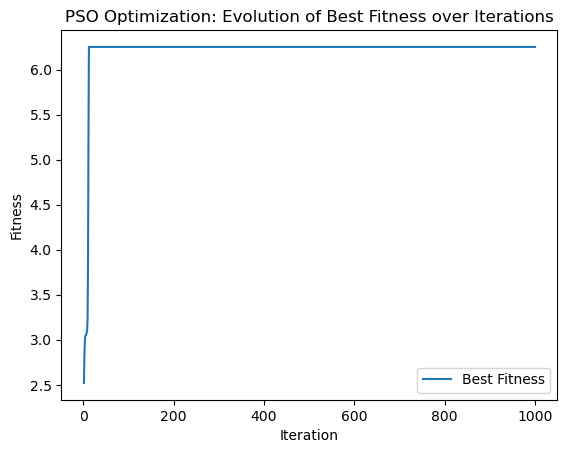

In [71]:
plt.plot(iteration_numbers, best_fitness_values, label='Best Fitness')
plt.title('PSO Optimization: Evolution of Best Fitness over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend()
plt.show()